# Comparing and Evaluating Clustering Algorithm

## Evaluating using ground truth

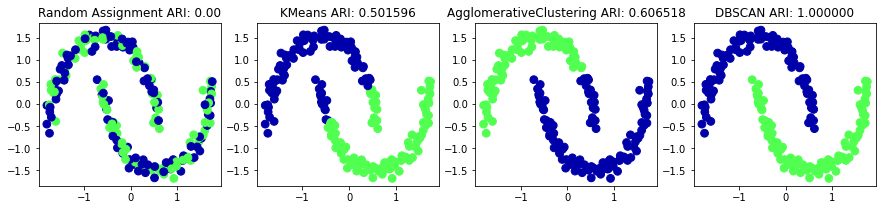

In [8]:
# using adjustd rand index (ARI)
from sklearn.metrics import adjusted_rand_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import numpy as np
import mglearn

X, y = make_moons(n_samples=200, noise=.05, random_state=0)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3))

# make list of algorithm to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random assigned cluster for reference
random_state = np.random.RandomState(seed=0)
random_cluster = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:,0], X_scaled[:, 1], c=random_cluster, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random Assignment ARI: %.2f" % adjusted_rand_score(y, random_cluster))

# plot the rest of algotithms
for ax, algorithm in zip(axes[1:], algorithms):
    # predict the clusters
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} ARI: {:2f}".format(algorithm.__class__.__name__,
                                        adjusted_rand_score(y, clusters)))

In [9]:
# common mistake for scoring the clustering is
# using accuracy_score instead of
# adjusted_rand_score or normalized_mutual_info_score
# because it looks for the label

from sklearn.metrics import accuracy_score

# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]

# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# adjusted rand score is 1, as the clustering is exactly the same
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


## Evaluating clustering without Ground Truth

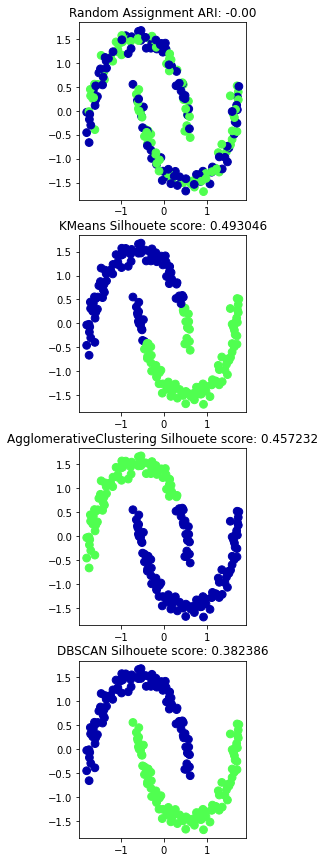

In [13]:
# using silhouette_score to evaluate clustering
# this scoring score by measuring the compactness
# of a cluster, this might not work with more complex shape

from sklearn.metrics import silhouette_score

X, y = make_moons(n_samples=200, noise=.05, random_state=0)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(4, 1, figsize=(3, 15))

# make list of algorithm to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

# create a random assigned cluster for reference
random_state = np.random.RandomState(seed=0)
random_cluster = random_state.randint(low=0, high=2, size=len(X))

# plot random assignment
axes[0].scatter(X_scaled[:,0], X_scaled[:, 1], c=random_cluster, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random Assignment ARI: %.2f" % silhouette_score(X_scaled, random_cluster))

# plot the rest of algotithms
for ax, algorithm in zip(axes[1:], algorithms):
    # predict the clusters
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} Silhouete score: {:2f}".format(algorithm.__class__.__name__,
                                        silhouette_score(X_scaled, clusters)))

another way to evaluate clustering is analyze manually